In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from sklearn.model_selection import train_test_split
import IPython
import progressbar
from time import sleep
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf 
tf.autograph.set_verbosity(1)
import pickle
   




In [7]:

def get_rank(W, thr):
    [Utemp,S,V] = np.linalg.svd(W)
    rank = np.count_nonzero(S > thr)
    return rank


def decimal_str(x: float, decimals: int = 10) -> str:
    return format(x, f".{decimals}f").lstrip().rstrip('0')


def get_flat_layer_1(x, conv1_w, conv1_b, conv2_w ,conv2_b, fc1_w, fc1_b, fc2_w, fc2_b, fc3_w, fc3_b):
	conv1 = tf.nn.conv2d(x,conv1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_b 
	# TODO: Activation.
	conv1 = tf.nn.relu(conv1)
	# Pooling Layer. Input = 28x28x1. Output = 14x14x6.
	pool_1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
	# TODO: Layer 2: Convolutional. Output = 10x10x16.
	conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b
	# TODO: Activation.
	conv2 = tf.nn.relu(conv2)# TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
	pool_2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
	# TODO: Flatten. Input = 5x5x16. Output = 400.
	fc1_temp = flatten(pool_2)
	# TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
	fc1 = tf.matmul(fc1_temp, fc1_w) + fc1_b
	# TODO: Activation.
	fc1 = tf.nn.relu(fc1)
	# TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
	fc2 = tf.matmul(fc1, fc2_w) + fc2_b
	# TODO: Activation.
	fc2 = tf.nn.relu(fc2)
	# TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
	logits = tf.matmul(fc2, fc3_w) + fc3_b
	sess = tf.Session()
	return sess.run(fc1_temp)


In [8]:
# tf.set_random_seed(0)



conv1_w = np.loadtxt('data/conv1_w', delimiter=',').reshape([5,5,1,6])
conv1_b = np.loadtxt('data/conv1_b',  delimiter=',')
conv2_w = np.loadtxt('data/conv2_w', delimiter=',').reshape([5,5,6,16])
conv2_b = np.loadtxt('data/conv2_b', delimiter=',')
fc1_w = np.loadtxt('data/fc1_w', delimiter=',')
fc1_b = np.loadtxt('data/fc1_b', delimiter=',')
fc2_w = np.loadtxt('data/fc2_w', delimiter=',')
fc2_b = np.loadtxt('data/fc2_b', delimiter=',')
fc3_w = np.loadtxt('data/fc3_w', delimiter=',')
fc3_b = np.loadtxt('data/fc3_b', delimiter=',')
train_x = np.loadtxt('data/train_x', delimiter=',').reshape([33600, 32, 32, 1])


# save_layer = get_flat_layer_1(train_x, conv1_w, conv1_b, conv2_w ,conv2_b, fc1_w, fc1_b, fc2_w, fc2_b, fc3_w, fc3_b)
# np.savetxt('data/fc1', save_layer,  delimiter=',')




In [14]:

rank_l1_tot = []
rank_l2_tot = []
#N_List = [200, 400, 800]
for N in [200]:
	compr_acc_train = []
	compr_acc_test = []
	notes_filename_1 = 'Lenet_layer1_Constr_low_rank_N_' + str(N) + '_notes_python'
	notes_1 = np.loadtxt('data/' + notes_filename_1 + '.txt', delimiter=',')
	n_notes_1, _ = notes_1.shape
	epsilon_1 = notes_1[:, 0]
	ranks_1 = notes_1[:, 1]

	notes_filename_2 = 'Lenet_layer2_Constr_low_rank_N_' + str(N) + '_notes_python'
	notes_2 = np.loadtxt('data/' + notes_filename_2 + '.txt', delimiter=',')
	n_notes_2, _ = notes_2.shape
	epsilon_2 = notes_2[:, 0]
	ranks_2 = notes_2[:, 1]
	rank_l1 = []
	rank_l2 = []
	bar_cnt = 0
	for eps in epsilon_2[:22]:
		
		file_name_1 = 'Lenet_layer1_Constr_Low_Rank_N_' + str(N) + '_Eps_' + str(decimal_str(eps)).replace('.', '')
		file_name_2 = 'Lenet_layer2_Constr_Low_Rank_N_' + str(N) + '_Eps_' + str(decimal_str(eps)).replace('.', '')
		# load first layer
		weight_lr1 = np.loadtxt('data/'+ file_name_1 + '.txt', delimiter=',')
		r1 = get_rank(weight_lr1, 0.001)
		rank_l1.append(r1)
		# threshold singular values for real low rank
		
		# load second layer
		weight_lr2 = np.loadtxt('data/'+ file_name_2 + '.txt', delimiter=',')
		r2 = get_rank(weight_lr2, 0.001)
		rank_l2.append(r2)


		# acc_temp = compression_accuracy(train_x, train_labels, conv1_w, conv1_b, conv2_w ,conv2_b, weight_lr1, fc1_b, weight_lr2, fc2_b, fc3_w, fc3_b)
		# compr_acc_train.append(acc_temp)
		# acc_temp = compression_accuracy(test_x, test_labels, conv1_w, conv1_b, conv2_w ,conv2_b, weight_lr1, fc1_b, weight_lr2, fc2_b, fc3_w, fc3_b)
		# compr_acc_test.append(acc_temp)
		

	

	rank_l1_tot.append(rank_l1)
	rank_l2_tot.append(rank_l2)

In [20]:


tot_params = 400*120 + 120 + 120*84 + 84

# # Result Second Run:
# N_200 = [0.97011906, 0.9703571, 0.9714286, 0.9715476, 0.9702381, 0.9704762, 0.9691667, 0.9675, 0.9647619, 0.96190476, 0.9588095, 0.9475, 0.91119045, 0.6875, 0.108571425, 0.108571425, 0.108571425, 0.108571425, 0.108571425]
# N_400 = [0.98, 0.98035717, 0.97964287, 0.97964287, 0.97892857, 0.97821426, 0.9775, 0.9765476, 0.9747619, 0.97309524, 0.97011906, 0.9597619, 0.9167857, 0.7890476, 0.108571425, 0.108571425, 0.108571425, 0.108571425, 0.108571425]
# N_800 = [0.98214287, 0.98261905, 0.98261905, 0.9829762, 0.9830952, 0.98261905, 0.98202384, 0.9809524, 0.9790476, 0.97833335, 0.97619045, 0.9695238, 0.95464283, 0.84011906, 0.108571425, 0.108571425, 0.108571425, 0.108571425, 0.108571425]


params_200 = []
params_400 = []
params_800 = []

for i in range(len(rank_l1_tot[0])):
	temp_params_200 = 400*rank_l1_tot[0][i] + rank_l1_tot[0][i]*120 + 120 + 120*rank_l2_tot[0][i] + rank_l2_tot[0][i]*84 + 84
# 	temp_params_400 = 400*rank_l1_tot[1][i] + rank_l1_tot[1][i]*120 + 120 + 120*rank_l2_tot[1][i] + rank_l2_tot[1][i]*84 + 84
# 	temp_params_800 = 400*rank_l1_tot[2][i] + rank_l1_tot[2][i]*120 + 120 + 120*rank_l2_tot[2][i] + rank_l2_tot[2][i]*84 + 84
	params_200.append(temp_params_200)
# 	params_400.append(temp_params_400)
# 	params_800.append(temp_params_800)


# NLR_test_acc = np.array(NLR_test_acc)
# NLR_size = np.array(NLR_size)
# LR_test_acc = np.array(LR_test_acc)
# LR_size = np.array(LR_size)
# LDR_test_acc = np.array(LDR_test_acc)
# LDR_size = np.array(LDR_size)
params_200 = np.array(params_200)
# params_400 = np.array(params_400)
# params_800 = np.array(params_800)

#N_200 = np.array(N_200)
# N_400 = np.array(N_400)
# N_800 = np.array(N_800)
# plt.plot(LDR_size*100/orig_size, LDR_test_acc/orig_test_acc,'r-*')
orig_test_acc = 0.9828

###################### 
# get the tuned results
res_dict = pickle.load(open( "data/MNIST_FT_dict_epochs.pkl", "rb" ))
res_dict_noepoch = pickle.load(open( "data/MNIST_FT_dict_no_epochs.pkl", "rb" ))



# notes_filename_1 = 'Lenet_layer1_Constr_low_rank_N_' + str(N) + '_notes_python'
# notes_1 = np.loadtxt('data/' + notes_filename_1 + '.txt', delimiter=',')
# n_notes_1, _ = notes_1.shape
# epsilon_1 = notes_1[:, 0]
# ranks_1 = notes_1[:, 1]

# notes_filename_2 = 'Lenet_layer2_Constr_low_rank_N_' + str(N) + '_notes_python'
# notes_2 = np.loadtxt('data/' + notes_filename_2 + '.txt', delimiter=',')
# epsilon_2 = notes_2[:, 0]
# ranks_2 = notes_2[:, 1]



N_200_ep0 = []
N_200_ep5 = []
N_200_ep10 = []
N_200_ep20 = []
# N_400_ep5 = []
# N_400_ep10 = []
# N_400_ep20 = []
# N_800_ep5 = []
# N_800_ep10 = []
# N_800_ep20 = []

for eps in epsilon_1[:22]:
    N_200_ep0.append(res_dict_noepoch[(200, eps)])
    N_200_ep5.append(res_dict[(200, 1, eps)])
    N_200_ep10.append(res_dict[(200,2, eps)])
    N_200_ep20.append(res_dict[(200,5, eps)])
# 	N_400_ep5.append(res_dict[(1, 400, eps)])
# 	N_400_ep10.append(res_dict[(2, 400, eps)])
# 	N_400_ep20.append(res_dict[(5, 400, eps)])
# 	N_800_ep5.append(res_dict[(1, 800, eps)])
# 	N_800_ep10.append(res_dict[(2, 800, eps)])
# 	N_800_ep20.append(res_dict[(5, 800, eps)])
######################

N_200_ep0 = np.array(N_200_ep0)
N_200_ep5 = np.array(N_200_ep5)
N_200_ep10 = np.array(N_200_ep10)
N_200_ep20 = np.array(N_200_ep20)
# N_400_ep5 = np.array(N_400_ep5)
# N_400_ep10 = np.array(N_400_ep10)
# N_400_ep20 = np.array(N_400_ep20)
# N_800_ep5 = np.array(N_800_ep5)
# N_800_ep10 = np.array(N_800_ep10)
# N_800_ep20 = np.array(N_800_ep20)



# plt.rcParams.update({
#     "text.usetex": True})

# NLR_test_acc = np.array(NLR_test_acc)
# NLR_size = np.array(NLR_size)
# LR_test_acc = np.array(LR_test_acc)
# LR_size = np.array(LR_size)
# # LDR_test_acc = np.array(LDR_test_acc)
# # LDR_size = np.array(LDR_size)

# # plt.plot(LDR_size*100/orig_size, LDR_test_acc/orig_test_acc,'r-*')

# plt.plot(LR_size*100/orig_size, LR_test_acc/orig_test_acc,'b-o', label=r'\textrm{Constrained Low Rank}')
# plt.plot(NLR_size*100/orig_size, NLR_test_acc/orig_test_acc,'g--s', label=r'\textrm{Low Rank}')

# plt.plot(NLR_size*100/orig_size, LR_FT_test_acc_total[0]/orig_test_acc,'r--s', label=r'\textrm{Low Rank (Ep = 5)}')
# plt.plot(NLR_size*100/orig_size, LR_FT_test_acc_total[1]/orig_test_acc,'y--s', label=r'\textrm{Low Rank (Ep = 10)}')
# # plt.plot(NLR_size*100/orig_size, LR_FT_test_acc_total[2]/orig_test_acc,'c--s', label=r'\textrm{Low Rank (Ep = 15))}')
# # plt.plot(NLR_size*100/orig_size, LR_FT_test_acc_total[3]/orig_test_acc,'k--s', label=r'\textrm{Low Rank (Ep = 20))}')


# plt.xlabel(r'$\textrm{Size Percentage}$', fontsize='x-large')
# plt.ylabel(r'$\frac{\textrm{Accuracy Compressed}}{\textrm{Accuracy Original}}$',fontsize='x-large') 
# plt.legend(loc=4)

# plt.title(r'\textrm{Spiral Dataset}', fontsize='x-large')
# plt.autoscale()
# plt.ylim([0.55, 1.04])
# plt.tight_layout()
# plt.savefig('Spiral_N_200_Compression_plot_FT')

In [19]:


# tot_params = 400*120 + 120 + 120*84 + 84

# # # Result Second Run:
# # N_200 = [0.97011906, 0.9703571, 0.9714286, 0.9715476, 0.9702381, 0.9704762, 0.9691667, 0.9675, 0.9647619, 0.96190476, 0.9588095, 0.9475, 0.91119045, 0.6875, 0.108571425, 0.108571425, 0.108571425, 0.108571425, 0.108571425]
# # N_400 = [0.98, 0.98035717, 0.97964287, 0.97964287, 0.97892857, 0.97821426, 0.9775, 0.9765476, 0.9747619, 0.97309524, 0.97011906, 0.9597619, 0.9167857, 0.7890476, 0.108571425, 0.108571425, 0.108571425, 0.108571425, 0.108571425]
# # N_800 = [0.98214287, 0.98261905, 0.98261905, 0.9829762, 0.9830952, 0.98261905, 0.98202384, 0.9809524, 0.9790476, 0.97833335, 0.97619045, 0.9695238, 0.95464283, 0.84011906, 0.108571425, 0.108571425, 0.108571425, 0.108571425, 0.108571425]


# params_200 = []
# params_400 = []
# params_800 = []

# for i in range(len(rank_l1_tot[0])):
# 	temp_params_200 = 400*rank_l1_tot[0][i] + rank_l1_tot[0][i]*120 + 120 + 120*rank_l2_tot[0][i] + rank_l2_tot[0][i]*84 + 84
# # 	temp_params_400 = 400*rank_l1_tot[1][i] + rank_l1_tot[1][i]*120 + 120 + 120*rank_l2_tot[1][i] + rank_l2_tot[1][i]*84 + 84
# # 	temp_params_800 = 400*rank_l1_tot[2][i] + rank_l1_tot[2][i]*120 + 120 + 120*rank_l2_tot[2][i] + rank_l2_tot[2][i]*84 + 84
# 	params_200.append(temp_params_200)
# # 	params_400.append(temp_params_400)
# # 	params_800.append(temp_params_800)


# # NLR_test_acc = np.array(NLR_test_acc)
# # NLR_size = np.array(NLR_size)
# # LR_test_acc = np.array(LR_test_acc)
# # LR_size = np.array(LR_size)
# # LDR_test_acc = np.array(LDR_test_acc)
# # LDR_size = np.array(LDR_size)
# params_200 = np.array(params_200)
# # params_400 = np.array(params_400)
# # params_800 = np.array(params_800)

# # N_400 = np.array(N_400)
# # N_800 = np.array(N_800)
# # plt.plot(LDR_size*100/orig_size, LDR_test_acc/orig_test_acc,'r-*')
# orig_test_acc = 0.9828

# ###################### 
# # get the tuned results
# res_dict = pickle.load(open( "data/MNIST_FT_dict_epochs.pkl", "rb" ))



# # notes_filename_1 = 'Lenet_layer1_Constr_low_rank_N_' + str(N) + '_notes_python'
# # notes_1 = np.loadtxt('data/' + notes_filename_1 + '.txt', delimiter=',')
# # n_notes_1, _ = notes_1.shape
# # epsilon_1 = notes_1[:, 0]
# # ranks_1 = notes_1[:, 1]

# # notes_filename_2 = 'Lenet_layer2_Constr_low_rank_N_' + str(N) + '_notes_python'
# # notes_2 = np.loadtxt('data/' + notes_filename_2 + '.txt', delimiter=',')
# # epsilon_2 = notes_2[:, 0]
# # ranks_2 = notes_2[:, 1]




# N_200_ep5 = []
# N_200_ep10 = []
# N_200_ep20 = []
# # N_400_ep5 = []
# # N_400_ep10 = []
# # N_400_ep20 = []
# # N_800_ep5 = []
# # N_800_ep10 = []
# # N_800_ep20 = []

# for eps in epsilon_1[:22]:
# 	N_200_ep5.append(res_dict[(200, 1, eps)])
# 	N_200_ep10.append(res_dict[(200,2, eps)])
# 	N_200_ep20.append(res_dict[(200,5, eps)])
# # 	N_400_ep5.append(res_dict[(1, 400, eps)])
# # 	N_400_ep10.append(res_dict[(2, 400, eps)])
# # 	N_400_ep20.append(res_dict[(5, 400, eps)])
# # 	N_800_ep5.append(res_dict[(1, 800, eps)])
# # 	N_800_ep10.append(res_dict[(2, 800, eps)])
# # 	N_800_ep20.append(res_dict[(5, 800, eps)])
# ######################


# N_200_ep5 = np.array(N_200_ep5)
# N_200_ep10 = np.array(N_200_ep10)
# N_200_ep20 = np.array(N_200_ep20)
# # N_400_ep5 = np.array(N_400_ep5)
# # N_400_ep10 = np.array(N_400_ep10)
# # N_400_ep20 = np.array(N_400_ep20)
# # N_800_ep5 = np.array(N_800_ep5)
# # N_800_ep10 = np.array(N_800_ep10)
# # N_800_ep20 = np.array(N_800_ep20)



# # plt.rcParams.update({
# #     "text.usetex": True})

# # NLR_test_acc = np.array(NLR_test_acc)
# # NLR_size = np.array(NLR_size)
# # LR_test_acc = np.array(LR_test_acc)
# # LR_size = np.array(LR_size)
# # # LDR_test_acc = np.array(LDR_test_acc)
# # # LDR_size = np.array(LDR_size)

# # # plt.plot(LDR_size*100/orig_size, LDR_test_acc/orig_test_acc,'r-*')

# # plt.plot(LR_size*100/orig_size, LR_test_acc/orig_test_acc,'b-o', label=r'\textrm{Constrained Low Rank}')
# # plt.plot(NLR_size*100/orig_size, NLR_test_acc/orig_test_acc,'g--s', label=r'\textrm{Low Rank}')

# # plt.plot(NLR_size*100/orig_size, LR_FT_test_acc_total[0]/orig_test_acc,'r--s', label=r'\textrm{Low Rank (Ep = 5)}')
# # plt.plot(NLR_size*100/orig_size, LR_FT_test_acc_total[1]/orig_test_acc,'y--s', label=r'\textrm{Low Rank (Ep = 10)}')
# # # plt.plot(NLR_size*100/orig_size, LR_FT_test_acc_total[2]/orig_test_acc,'c--s', label=r'\textrm{Low Rank (Ep = 15))}')
# # # plt.plot(NLR_size*100/orig_size, LR_FT_test_acc_total[3]/orig_test_acc,'k--s', label=r'\textrm{Low Rank (Ep = 20))}')


# # plt.xlabel(r'$\textrm{Size Percentage}$', fontsize='x-large')
# # plt.ylabel(r'$\frac{\textrm{Accuracy Compressed}}{\textrm{Accuracy Original}}$',fontsize='x-large') 
# # plt.legend(loc=4)

# # plt.title(r'\textrm{Spiral Dataset}', fontsize='x-large')
# # plt.autoscale()
# # plt.ylim([0.55, 1.04])
# # plt.tight_layout()
# # plt.savefig('Spiral_N_200_Compression_plot_FT')

In [21]:
len(params_200)

22

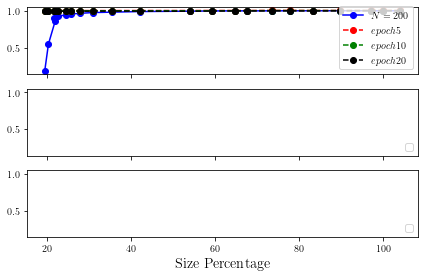

Python 3.6.10 |Anaconda, Inc.| (default, May  8 2020, 02:54:21) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.16.1 -- An enhanced Interactive Python. Type '?' for help.



In [ ]:
plt.rcParams.update({"text.usetex": True})


fig, axs = plt.subplots(3, sharex=True, sharey=True)
#fig.suptitle('Sharing both axes')


axs[0].plot(params_200*100/tot_params, N_200_ep0/orig_test_acc,'b-o', label=r'$N=200$')
# axs[1].plot(params_400[:-5]*100/tot_params, N_400[:-5]/orig_test_acc,'b-o', label=r'$N=400$')
# axs[2].plot(params_800[:-5]*100/tot_params, N_800[:-5]/orig_test_acc,'b-o', label=r'$N=800$')

axs[0].plot(params_200*100/tot_params, N_200_ep5/orig_test_acc,'r--o', label=r'$epoch 5$')
axs[0].plot(params_200*100/tot_params, N_200_ep10/orig_test_acc,'g--o', label=r'$epoch 10$')
axs[0].plot(params_200*100/tot_params, N_200_ep20/orig_test_acc,'k--o', label=r'$epoch 20$')

# axs[1].plot(params_400[:-5]*100/tot_params, N_400_ep5[:-5]/orig_test_acc,'r--o', label=r'$epoch 5$')
# axs[1].plot(params_400[:-5]*100/tot_params, N_400_ep10[:-5]/orig_test_acc,'g--o', label=r'$epoch 10$')
# axs[1].plot(params_400[:-5]*100/tot_params, N_400_ep20[:-5]/orig_test_acc,'k--o', label=r'$epoch 20$')

# axs[2].plot(params_800[:-5]*100/tot_params, N_800_ep5[:-5]/orig_test_acc,'r--o', label=r'$epoch 5$')
# axs[2].plot(params_800[:-5]*100/tot_params, N_800_ep10[:-5]/orig_test_acc,'g--o', label=r'$epoch 10$')
# axs[2].plot(params_800[:-5]*100/tot_params, N_800_ep20[:-5]/orig_test_acc,'k--o', label=r'$epoch 20$')
#plt.plot(NLR_size*100/orig_size, LR_FT_test_acc_total[1]/orig_test_acc,'y--s', label=r'\textrm{Low Rank (Ep = 10)}')
# plt.plot(NLR_size*100/orig_size, LR_FT_test_acc_total[2]/orig_test_acc,'c--s', label=r'\textrm{Low Rank (Ep = 15))}')
# plt.plot(NLR_size*100/orig_size, LR_FT_test_acc_total[3]/orig_test_acc,'k--s', label=r'\textrm{Low Rank (Ep = 20))}')
plt.xlabel(r'$\textrm{Size Percentage}$', fontsize='x-large')
# axs[1].ylabel(r'$\frac{\textrm{Accuracy Compressed}}{\textrm{Accuracy Original}}$',fontsize='x-large') 
axs[0].legend(loc=4)
axs[1].legend(loc=4)
axs[2].legend(loc=4)
# axs[0].set_xlim([0.8, 1.02])
# axs[1].set_xlim([0.8, 1.02])
# axs[2].set_xlim([0.8, 1.02])
#plt.title(r'\textrm{MNIST Dataset}', fontsize='x-large')
# fig.text(0.5, 0.8, 'common X', ha='center')
# fig.text(0.0, 0.5, 'common Y', va='center', rotation='vertical')

plt.autoscale()
#plt.ylim([0.65, 1.04])
plt.tight_layout()
#plt.savefig('MNSIT_Compression_plot_FT')
plt.show()


IPython.embed()